In [1]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
import os

In [2]:
cleaned_df = pd.read_json("filtered.json.zip", compression = 'zip')

## Sentiment analysis using VADER

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
def get_sentiment_intensity(tweet_text):
    '''
    This method returns the sentiment intensity
    within a certain Tweet's text (from -1.0 to 1.0).
    '''
    sentiment_analyser = SentimentIntensityAnalyzer()
    polarity_scores = sentiment_analyser.polarity_scores(tweet_text)
    return polarity_scores['compound']

In [8]:
cleaned_df['Sentiment'] = cleaned_df['Quote'].apply(lambda x: get_sentiment_intensity(x))

In [12]:
cleaned_df.sample(10)

,date_of_birth,nationality,gender,occupation,Speaker,Quote,numOccurrences,quote_year,quote_month,Sentiment
7704,1956,[United States of America],[female],[politician],annise parker,you would have to travel 520 miles north or 90...,2,2019,1,0.0772
4647,1982,[United States of America],[male],"[politician, military officer, statesperson]",pete buttigieg,I have an idea on how we can stop sexism on th...,1,2020,2,-0.2960
112716,1983,[United States of America],[male],[ice hockey player],ryan carter,What Folau fails to understand is the differen...,1,2019,6,-0.4215
96148,1976,[United Kingdom],[female],[sports journalist],carrie davis,New York City's forward-thinking and progressi...,1,2017,3,0.7717
14563,1886,[United States of America],[male],[baseball player],ty cobb,This is not just a fight over words on a piece...,1,2017,11,0.2924
7,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,These ads have the potential to accelerate muc...,1,2015,12,0.4588
44438,1986,[United States of America],[male],[politician],jeremy moss,"says he is gay as well as a practicing Jew,",3,2019,6,0.2732
78301,1945,"[British India, Dominion of India, India]",[female],"[film director, screenwriter, film actor]",aparna sen,"Self-centered, do nothing for society, no comm...",73,2017,6,0.7619
86745,1980,[United States of America],[male],"[film actor, stage actor, television actor, vo...",jake gyllenhaal,I did grow up in a family where both my sister...,1,2017,5,-0.5267
114095,1955,[United States of America],[male],[mathematician],william goldman,If homosexuals have an enemy it is age. And Ga...,1,2019,10,-0.9485


In [11]:
cleaned_df.to_pickle("added_sentiment.pkl")

In [20]:
cleaned_df.iloc[114095]["Quote"]

"but his record as governor [ of Massachusetts ] was very, very weak. In fact, he led the country on three of the left's most cherished issues -- cap and trade, gay marriage, and socialized medicine. Some of this legislation served as a model for national versions of those same policies. He really is the leader of the RINOs in America today. With the Senate barely under Republican control, Romney is now in a position to break off a few key senators and cause Trump trouble as Trump pursues an America First agenda."

## Plots of sentiments

In [2]:
unpickled_df = pd.read_pickle("added_sentiment.pkl")

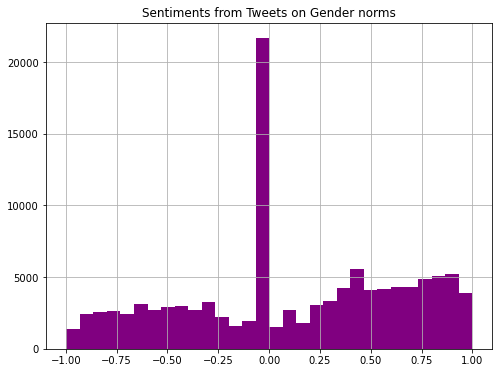

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
unpickled_df["Sentiment"].hist(bins=30,
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Gender norms")
plt.show()